# Importing requried modules

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from textblob import TextBlob
import collections

# Loading & Analysing the Data

In [9]:
# reading the given csv file 
# and creating dataframe
data= pd.read_csv("emails1")
  
# store dataframe into csv file
#data.to_csv("emails1.csv",index = None)
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the changes below are planned for the indicated\nOASIS/...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,037.50 for the month of \nNovember. This figure do...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,"BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01,s give a big round of applause to the Weather Tea...",Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue: 2000-12\n*********SPECIAL HOLIDAY EDITION********...,Non Abusive


In [10]:
data.tail()

,Unnamed: 0,filename,Message-ID,content,Class
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the changes below are planned for the indicated\nOASIS/...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,037.50 for the month of \nNovember. This figure do...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,"BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01,s give a big round of applause to the Weather Tea...",Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue: 2000-12\n*********SPECIAL HOLIDAY EDITION********...,Non Abusive
48075,48075,campbell-l/notes_inbox/137.,<10677824.1075857876692.JavaMail.evans@thyme>,---------------------- Forwarded by Tamara Jae Black/HOU/ECT on 12/06/2000 \n04:45 PM ----------...,Non Abusive


In [12]:
# Droping the unwanted column from dataset
data.drop('Unnamed: 0', axis=1, inplace=True)

## Information about dataset

In [13]:
data.columns

Index(['filename', 'Message-ID', 'content', 'Class'], dtype='object')

Dataset has 48076 datapoints and 4 columns

In [14]:
data.shape

(48076, 4)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB




*   Our data is in form of DataFrame not as arry or list or dictionary format

*   There are totally 48076 mails or entries.


*   All the columns are object datatype and they are classified correctly as we can see from variables description they are not numerical data.

*   There are no Null entries or NaN values in our dataset.

No.of Unique values/entries in Message-ID column
As it is a ID every entry is a unique value

In [16]:
data['Message-ID'].nunique()

48076

No.of Unique values/entries in filename column, As it is a name of file every entry is a unique value

In [17]:
data['filename'].nunique()

48076

No.of type of mail contents in dataset. Here we can see there are nearly half of the mails are haveing same  stop words, nouns and verbs etc.  

In [18]:
data['content'].nunique()

24656

No.of Unique values in Class column and their counts

In [17]:
data['Class'].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

C:\Users\DELL1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


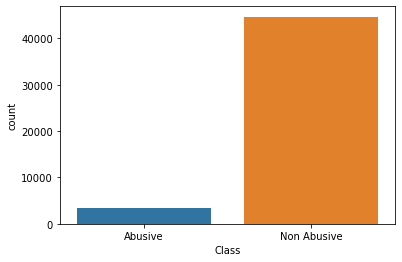

In [19]:
# Countplot for unique values in Class variable
sns.countplot(data.Class);

In [20]:
email = data.drop(columns=[ 'filename', 'Message-ID'], axis=1)
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Abusive
3,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive


In [21]:
abusive = email[email["Class"]=="Abusive"]
abusive.shape

(3410, 2)

In [22]:
non_abusive = email[email["Class"]=="Non Abusive"]
non_abusive.shape

(44666, 2)

Removing duplicate datapoints from non_abusive dataframe. Here we are removing duplicates olny from non_abusive dataframe because given data is imbalance with less No.of abusive emails 

In [23]:
non_abusive1 = non_abusive.drop_duplicates()
non_abusive1.shape

(23014, 2)

Now the data is somewhat balanced than before

In [24]:
print("Abusive ", len(abusive),"\n""Non Abusive ", len(non_abusive1))

Abusive  3410 
Non Abusive  23014


In [25]:
data = pd.concat([abusive,non_abusive1], axis=0, ignore_index=True)

# TEXT PRE-PROCESSING

## Exploratory Data Analusis (EDA)

### Expanding Contractions

In [26]:
data['no_contract'] = data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
data['no_contract']

0        [eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...
1                                                                                                [fuck, you]
2        [Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...
3        [sorry, I have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...
4        [asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...
                                                        ...                                                 
26419    [Do, you, need, new, leads, for, your, business, ?, Do, you, need, increased, Internet, Exposure...
26420    [[IMAGE], [IMAGE], [IMAGE], GARTH, BROOKS, "Wrapped, Up, In, You", [IMAGE], [IMAGE], =, WIN, TIC...
26421    [[IMAGE][IMAGE][IMAGE], Dear, SmartReminders, member,, [IMAGE], FranChoice, is, a, free,, one-on...
26422    [[IMAGE], 

In [27]:
data['content_str'] = [' '.join(map(str, l)) for l in data['no_contract']]
data['content_str']

0        eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...
1                                                                                                   fuck you
2        Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...
3        sorry I have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...
4        asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...
                                                        ...                                                 
26419    Do you need new leads for your business ? Do you need increased Internet Exposure ? Thousands jo...
26420    [IMAGE] [IMAGE] [IMAGE] GARTH BROOKS "Wrapped Up In You" [IMAGE] [IMAGE] = WIN TICKETS + TRIP TO...
26421    [IMAGE][IMAGE][IMAGE] Dear SmartReminders member, [IMAGE] FranChoice is a free, one-on-one consu...
26422    [IMAGE] [I

In [28]:
data[['content','content_str']].head()

,content,content_str
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...
1,fuck you,fuck you
2,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...
3,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,sorry I have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...



1.  Contractions are the little literary shortcuts, where we use "Should’ve" insted of "should have" , "Don't" insted of "Do Not" this contrction function expand those shortcuts. 
2.  We are going to add a new column to our dataframe called 'content_str' and apply contraction function to 'content' column which will expand any contractions
3. In the 4th row we can see "i've" is expanded to "i have". 





### Removing Punctuations

In [29]:
data['no_punc'] = data['content_str'].str.replace('[^\w\s]','')
data.iloc[:,2:].head()

<ipython-input-29-f8fd646005bf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['no_punc'] = data['content_str'].str.replace('[^\w\s]','')


,no_contract,content_str,no_punc
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...
1,"[fuck, you]",fuck you,fuck you
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...
3,"[sorry, I have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...",sorry I have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...


### Tokenization

Tokenization of the string i.e divding the string into separate words

In [30]:
data['tokenized'] = data['no_punc'].apply(word_tokenize)
data.iloc[:,2:].head()

,no_contract,content_str,no_punc,tokenized
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,..."
1,"[fuck, you]",fuck you,fuck you,"[fuck, you]"
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al..."
3,"[sorry, I have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...",sorry I have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo..."
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j..."


### Converting all Characters to Lowercase

Converting Uppercase letters to Lowercase

In [31]:
data['lower'] = data['tokenized'].apply(lambda x: [word.lower() for word in x])
data.iloc[:,2:].head()

,no_contract,content_str,no_punc,tokenized,lower
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,..."
1,"[fuck, you]",fuck you,fuck you,"[fuck, you]","[fuck, you]"
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al..."
3,"[sorry, I have, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soo...",sorry I have taken so long...just been trying to fend off the chicks. life is sooooo hard someti...,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo..."
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j..."


### Number of stopwords

Adding a column "stopwords" which shows the count of stopwords in the text.

In [32]:
stop = stopwords.words('english')

data['stopwords'] = data['content_str'].apply(lambda x: len([x for x in x.split() if x in stop]))
data.iloc[:,4:].head()


,no_punc,tokenized,lower,stopwords
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1
1,fuck you,"[fuck, you]","[fuck, you]",1
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11
3,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...",24
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2


### Removing Stopwords

In [33]:
stop_words = set(stopwords.words('english'))
data['stopwords_removed'] = data['lower'].apply(lambda x: [word for word in x if word not in stop_words])
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo..."
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck]
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra..."
3,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...",24,"[sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro..."
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see..."


### Number of words

In [34]:
#Number of Words in single email
data['word_count'] = data['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77
3,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...",24,"[sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...",39
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27


### Number of Characters

In [35]:
#Number of characters in single email 
data['char_count'] = data['no_punc'].str.len() 
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count,char_count
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35,182
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1,8
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77,545
3,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...",24,"[sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...",39,387
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27,175


### Stemming

The idea of stemming is to reduce different forms of word usage into its root word.
For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive”.so stemming function converts the words to their rootwords.

In [36]:
data['stp_rem_str'] = [' '.join(map(str, l)) for l in data['stopwords_removed']]

In [37]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['stemmi']=data['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [38]:
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count,char_count,stp_rem_str,stemmi
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35,182,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject football bets 20...,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1,8,fuck,fuck
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77,545,gentlemen following champagne available 70 approximate retail price also interest trading red wi...,gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...
3,sorry I have taken so longjust been trying to fend off the chicks life is sooooo hard sometimes ...,"[sorry, I, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...","[sorry, i, have, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo...",24,"[sorry, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian, oro...",39,387,sorry taken longjust trying fend chicks life sooooo hard sometimes monkey brian orourkeexcelr co...,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27,175,asshole john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl...,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...


### Lemmatization

Lemmatization is a similar method as stemming but by lemmatization proces we will find the morphological root words.

In [39]:
from textblob import Word

In [40]:
data['lemma'] = data['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [41]:
data[['stemmi','lemma']].head()

,stemmi,lemma
0,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...
1,fuck,fuck
2,gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...,gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...
3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...
4,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...


### Removing Numbers

In [42]:
import re

In [43]:
# Removing numbers form text
data['cleaned']=data['lemma'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [44]:
data.iloc[:,-2:].head()

,lemma,cleaned
0,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...
1,fuck,fuck
2,gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...
3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun 0...,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun ...
4,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...


### Sentiment Analysis

Assigning a polarity value for the text which ranges for -1 to 1 which describes the negativity and positiviy of the text.
Adding a column 'senti_polar' which shows the polarity value.

In [45]:
data['senti_polar'] = data['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )


In [46]:
data[['content','Class','senti_polar']].tail()

,content,Class,senti_polar
26419,Do you need new leads for your business ?\n Do you need increased Internet Exposure ?\n\n Thous...,Non Abusive,0.174825
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""Wrapped Up In You"" [IMAGE] [IMAGE] =\n ...",Non Abusive,0.298295
26421,"\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders member,\n[IMAGE]\t\n\n\n FranChoice is a free...",Non Abusive,0.105844
26422,"\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ROCK ""Forever"" [IMAGE] Official Kid Rock Sit...",Non Abusive,0.100812
26423,"\nYou received this e-mail because you registered on the E*TRADE Web site, or on one of our par...",Non Abusive,0.141234


#### Sentiment Analysis Visualizations

In [47]:
data_abu=data.loc[data['Class'] == 'Abusive']
data_nabu=data.loc[data['Class']=='Non Abusive']

Histogram of Sentiment polarity range 

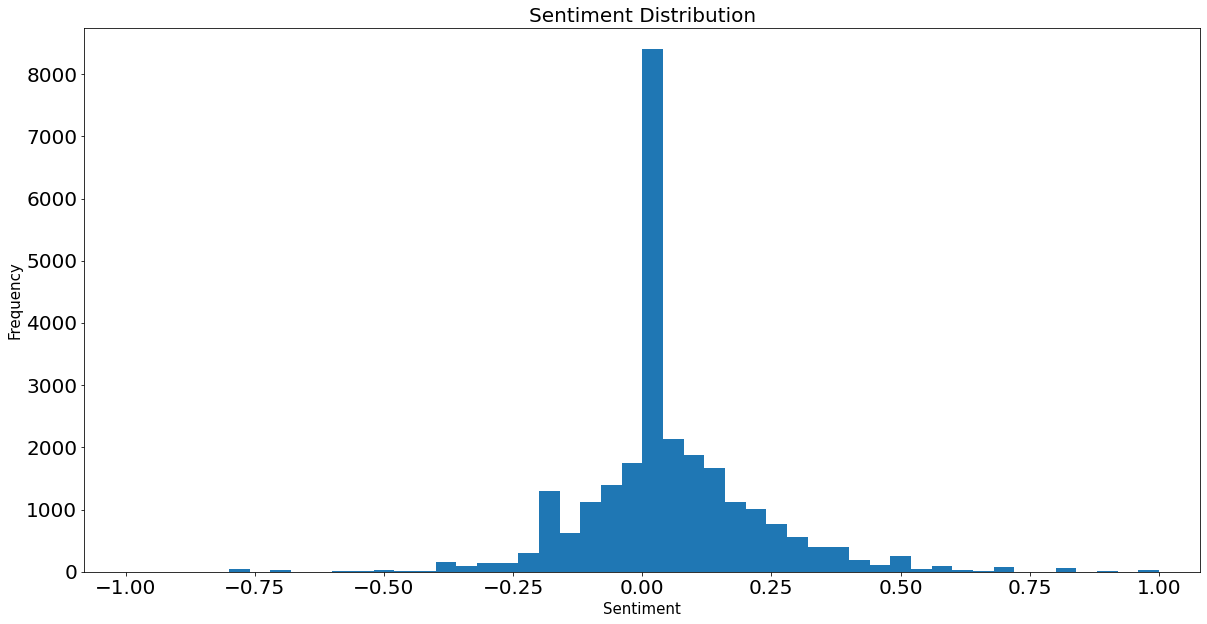

In [48]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(data['senti_polar'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

The above histogram is skewed to towards posivtive polarity as we know there are more Non abusive mails than abusive mails
in our data.

Histogram for Sentiment polarity range for Abusive and Non Abusive emails.

Text(0, 0.5, 'No.of emails')

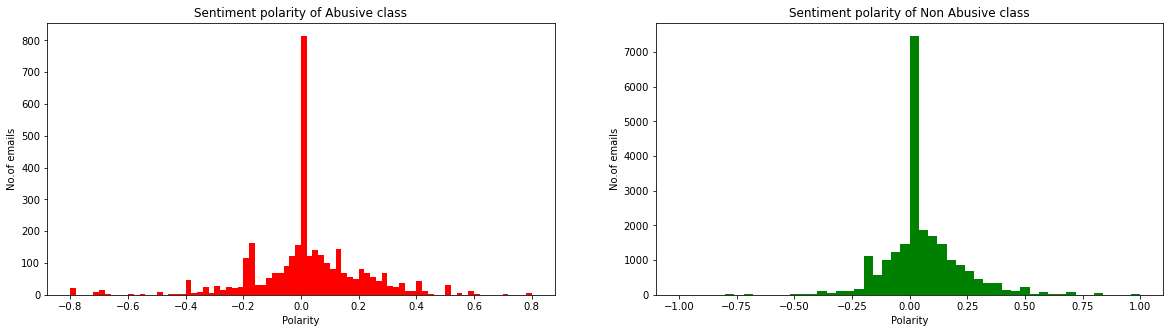

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(data_abu['senti_polar'], bins=80,color='r',);
plt.title('Sentiment polarity of Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')
plt.subplot(1,2,2)
plt.hist(data_nabu['senti_polar'], bins=50,color='g');
plt.title('Sentiment polarity of Non Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')

## Wordcloud 

Wordcolud for top 100 most used words in the emails . The size of the words is directly propotional to the usage of words.


In [50]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [51]:
# Joining the list into one string/text
text = ' '.join(data['stp_rem_str'])


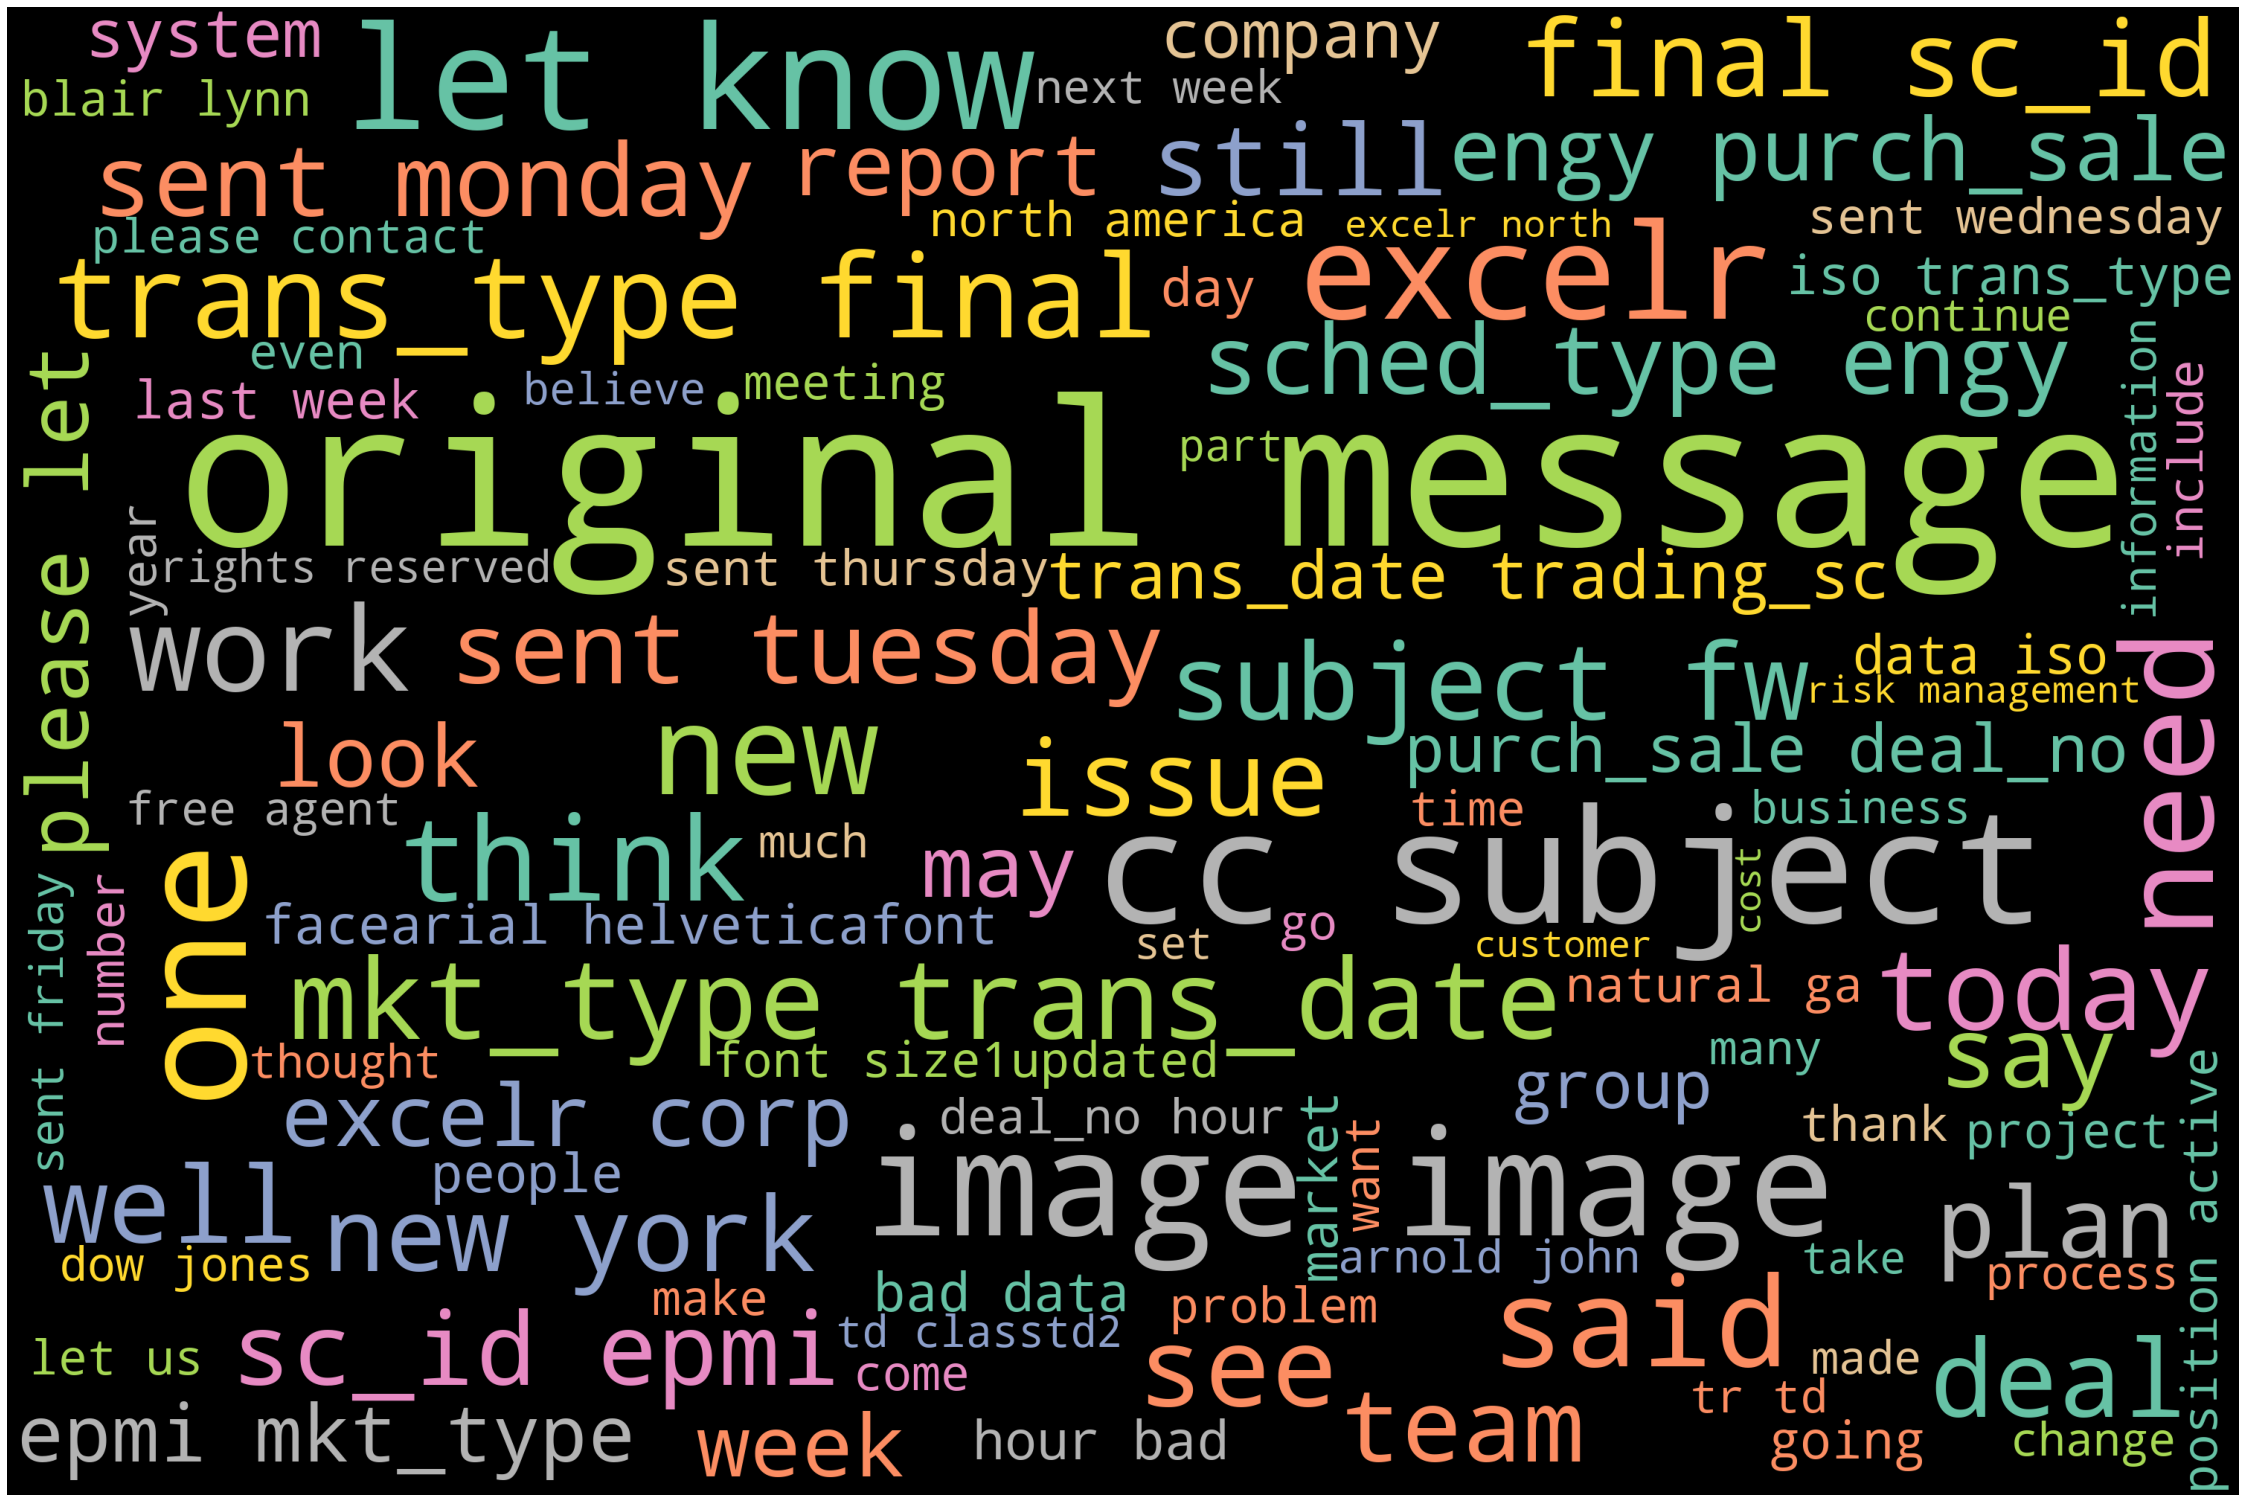

In [52]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

### Bargraph of Top 25 most used words in emails.

In [53]:
email=np.array(data_nabu['cleaned'])
s=str(email)
nabu_toc = word_tokenize(s)
print(nabu_toc)

['[', "'forecast'", "'travel", 'busi', 'meet', 'take', 'fun', 'trip', 'especi', 'prepar', 'present', 'would', 'suggest', 'hold', 'busi', 'plan', 'meet', 'take', 'trip', 'without', 'formal', 'busi', 'meet', 'would', 'even', 'tri', 'get', 'honest', 'opinion', 'whether', 'trip', 'even', 'desir', 'necessari', 'far', 'busi', 'meet', 'think', 'would', 'product', 'tri', 'stimul', 'discus', 'across', 'differ', 'group', 'work', 'often', 'present', 'speak', 'other', 'quiet', 'wait', 'turn', 'meet', 'might', 'better', 'held', 'round', 'tabl', 'discus', 'format', 'suggest', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'fli', 'somewher', 'take', 'much', "time'", "'test", 'success', 'way', 'go', "'", '...', "'imageimageimag", 'dear', 'smartremind', 'member', 'imag', 'franchoic', 'free', 'oneonon', 'consult', 'servic', 'peopl', 'look', 'purchas', 'franchis', 'busi', 'help', 'hundr', 'new', 'entrepreneur', 'save', 'time', 'research', 'right', 'opportun', 'discov', 'prescreen', 

In [54]:
email_ab=np.array(data_abu['cleaned'])
s=str(email_ab)
abu_toc = word_tokenize(s)
print(abu_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'got", 'late', 'friday', 'ever', 'heard', 'origin', 'messag', 'jeff', 'lawson', 'mailtojeffreyskillingyahoocom', 'sent', 'wednesday', 'novemb', 'pm', 'zipper', 'andi', 'subject', 'fuck', 'piec', 'shit', 'wait', 'see', 'go', 'shi

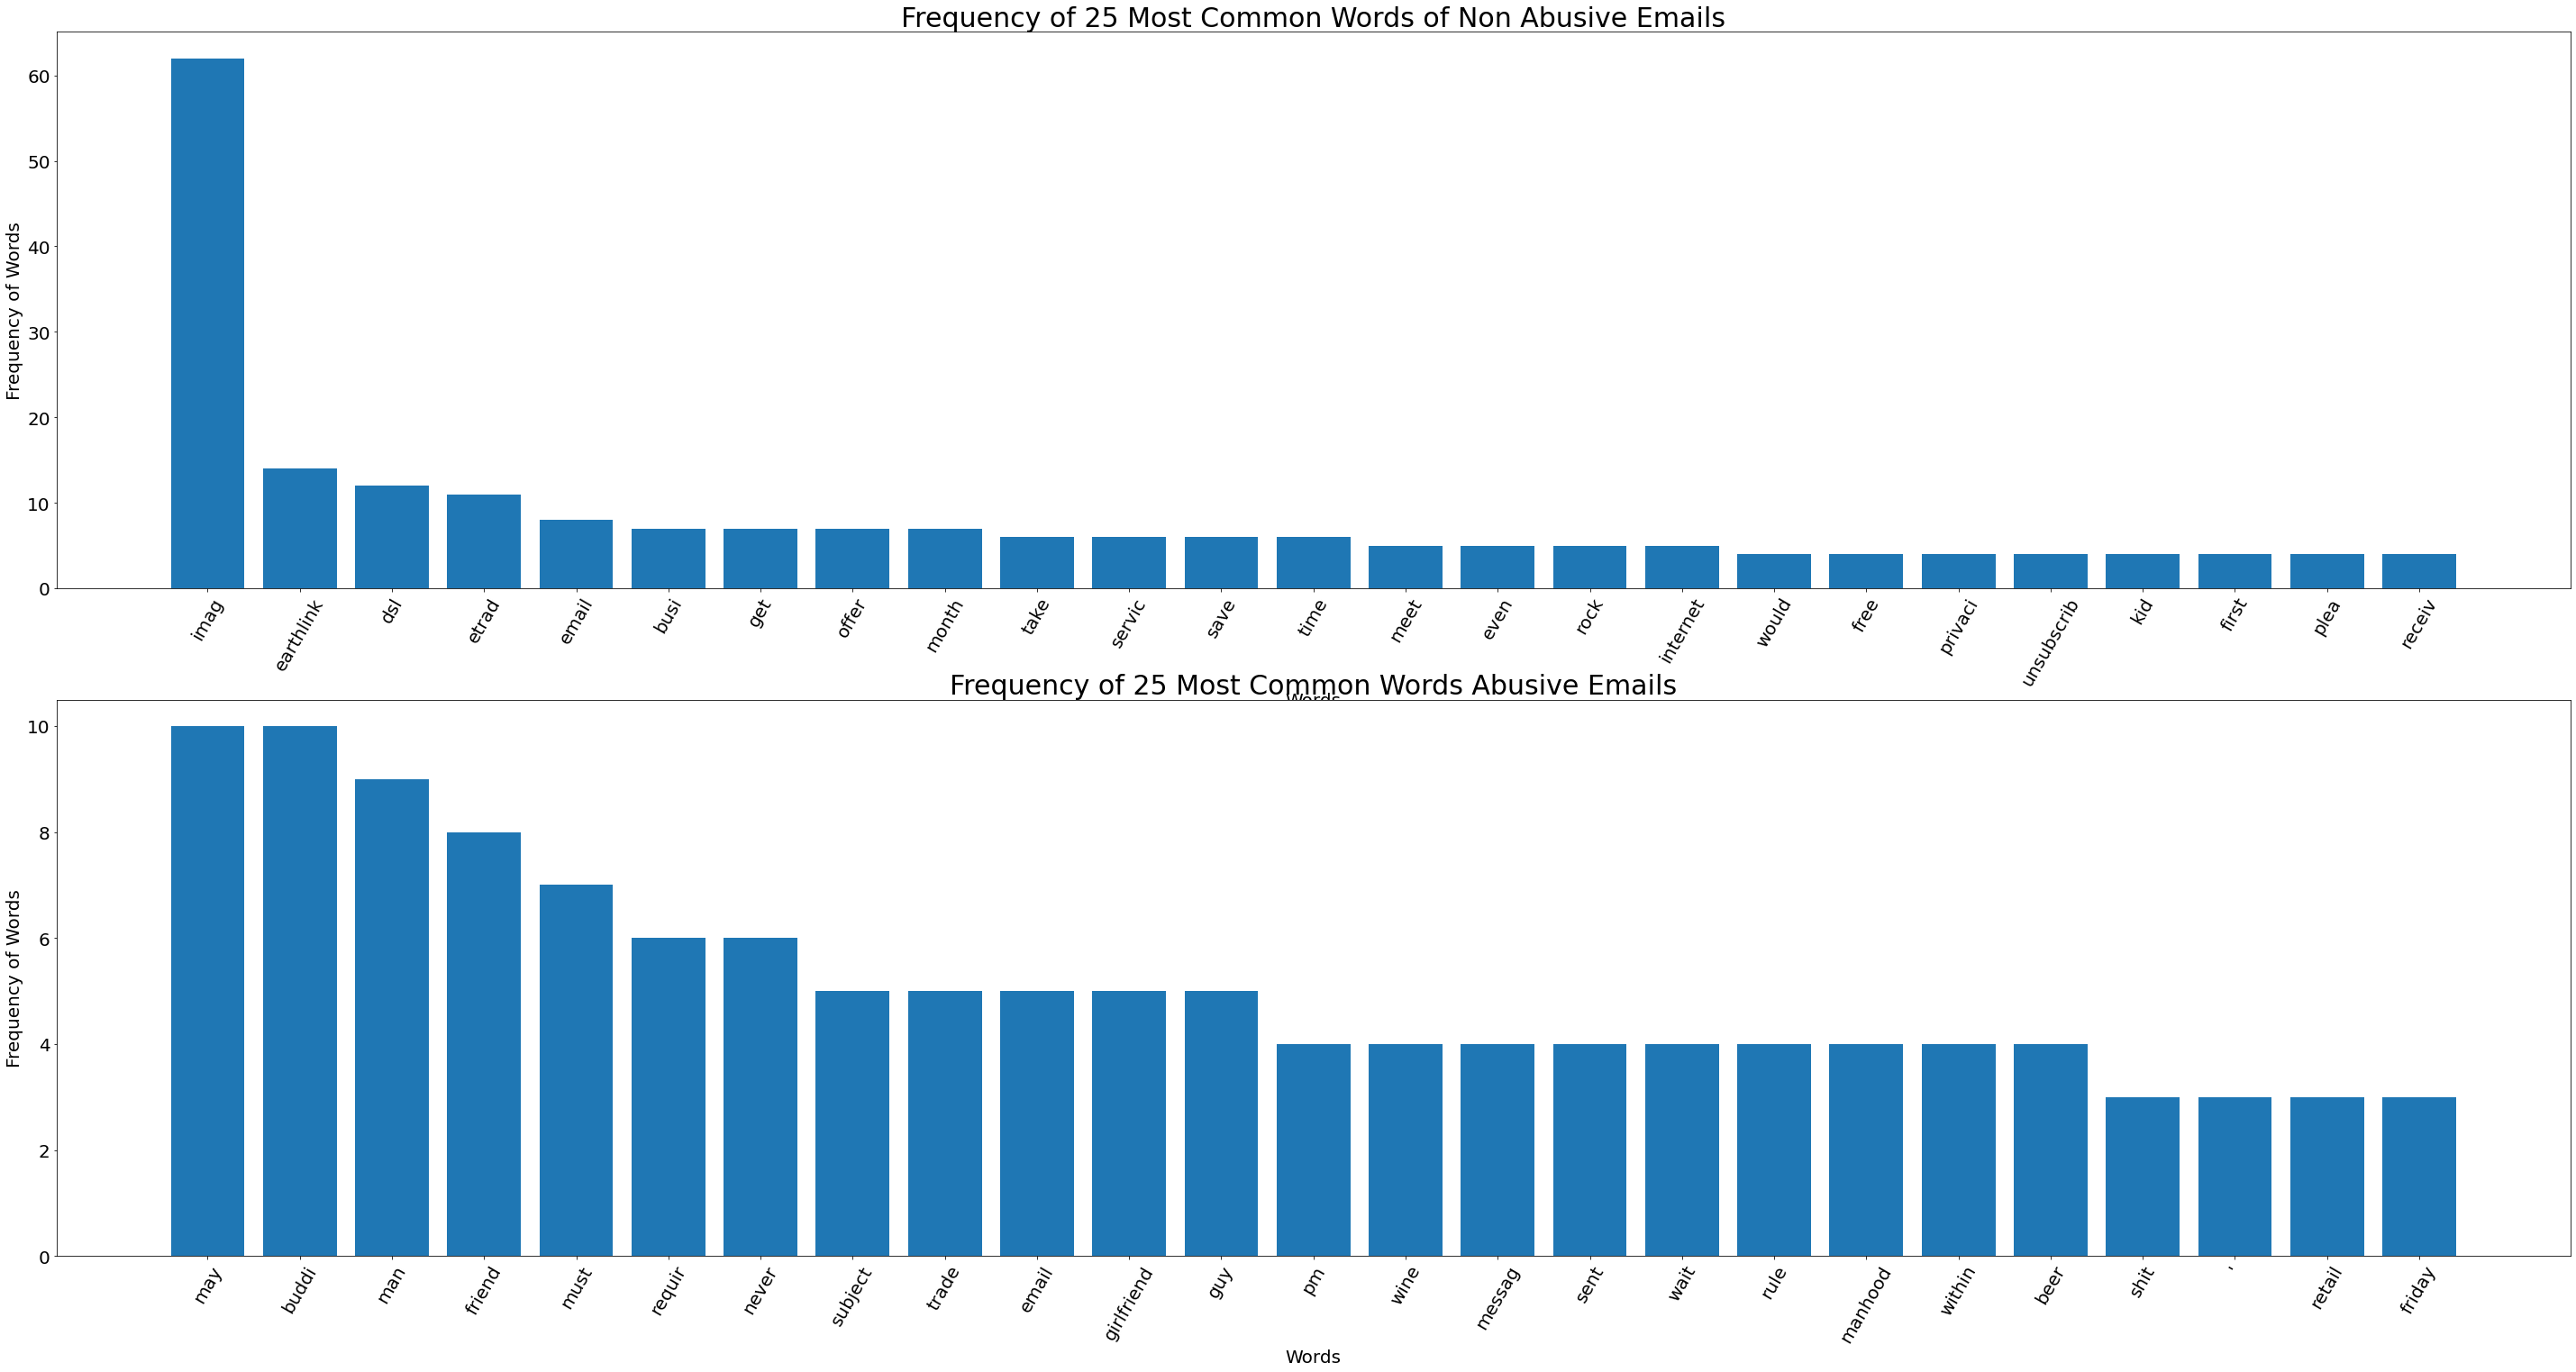

In [55]:
from nltk.probability import FreqDist
mostcommon_1 = FreqDist(nabu_toc).most_common(25)
x, y = zip(*mostcommon_1)
mostcommon_2 =FreqDist(abu_toc).most_common(25)
x1, y1 = zip(*mostcommon_2)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.subplot(2,1,1)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words of Non Abusive Emails', fontsize=30)
plt.subplot(2,1,2)
plt.bar(x1, y1)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words Abusive Emails', fontsize=30)
plt.show()

Top 25 words in all the emails in our data

In [56]:
email_all=np.array(data['cleaned'])
s=str(email_all)
all_toc = word_tokenize(s)
print(all_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'imageimageimag", 'dear', 'smartremind', 'member', 'imag', 'franchoic', 'free', 'oneonon', 'consult', 'servic', 'peopl', 'look', 'purchas', 'franchis', 'busi', 'help', 'hundr', 'new', 'entrepreneur', 'save', 'time', 'research', 

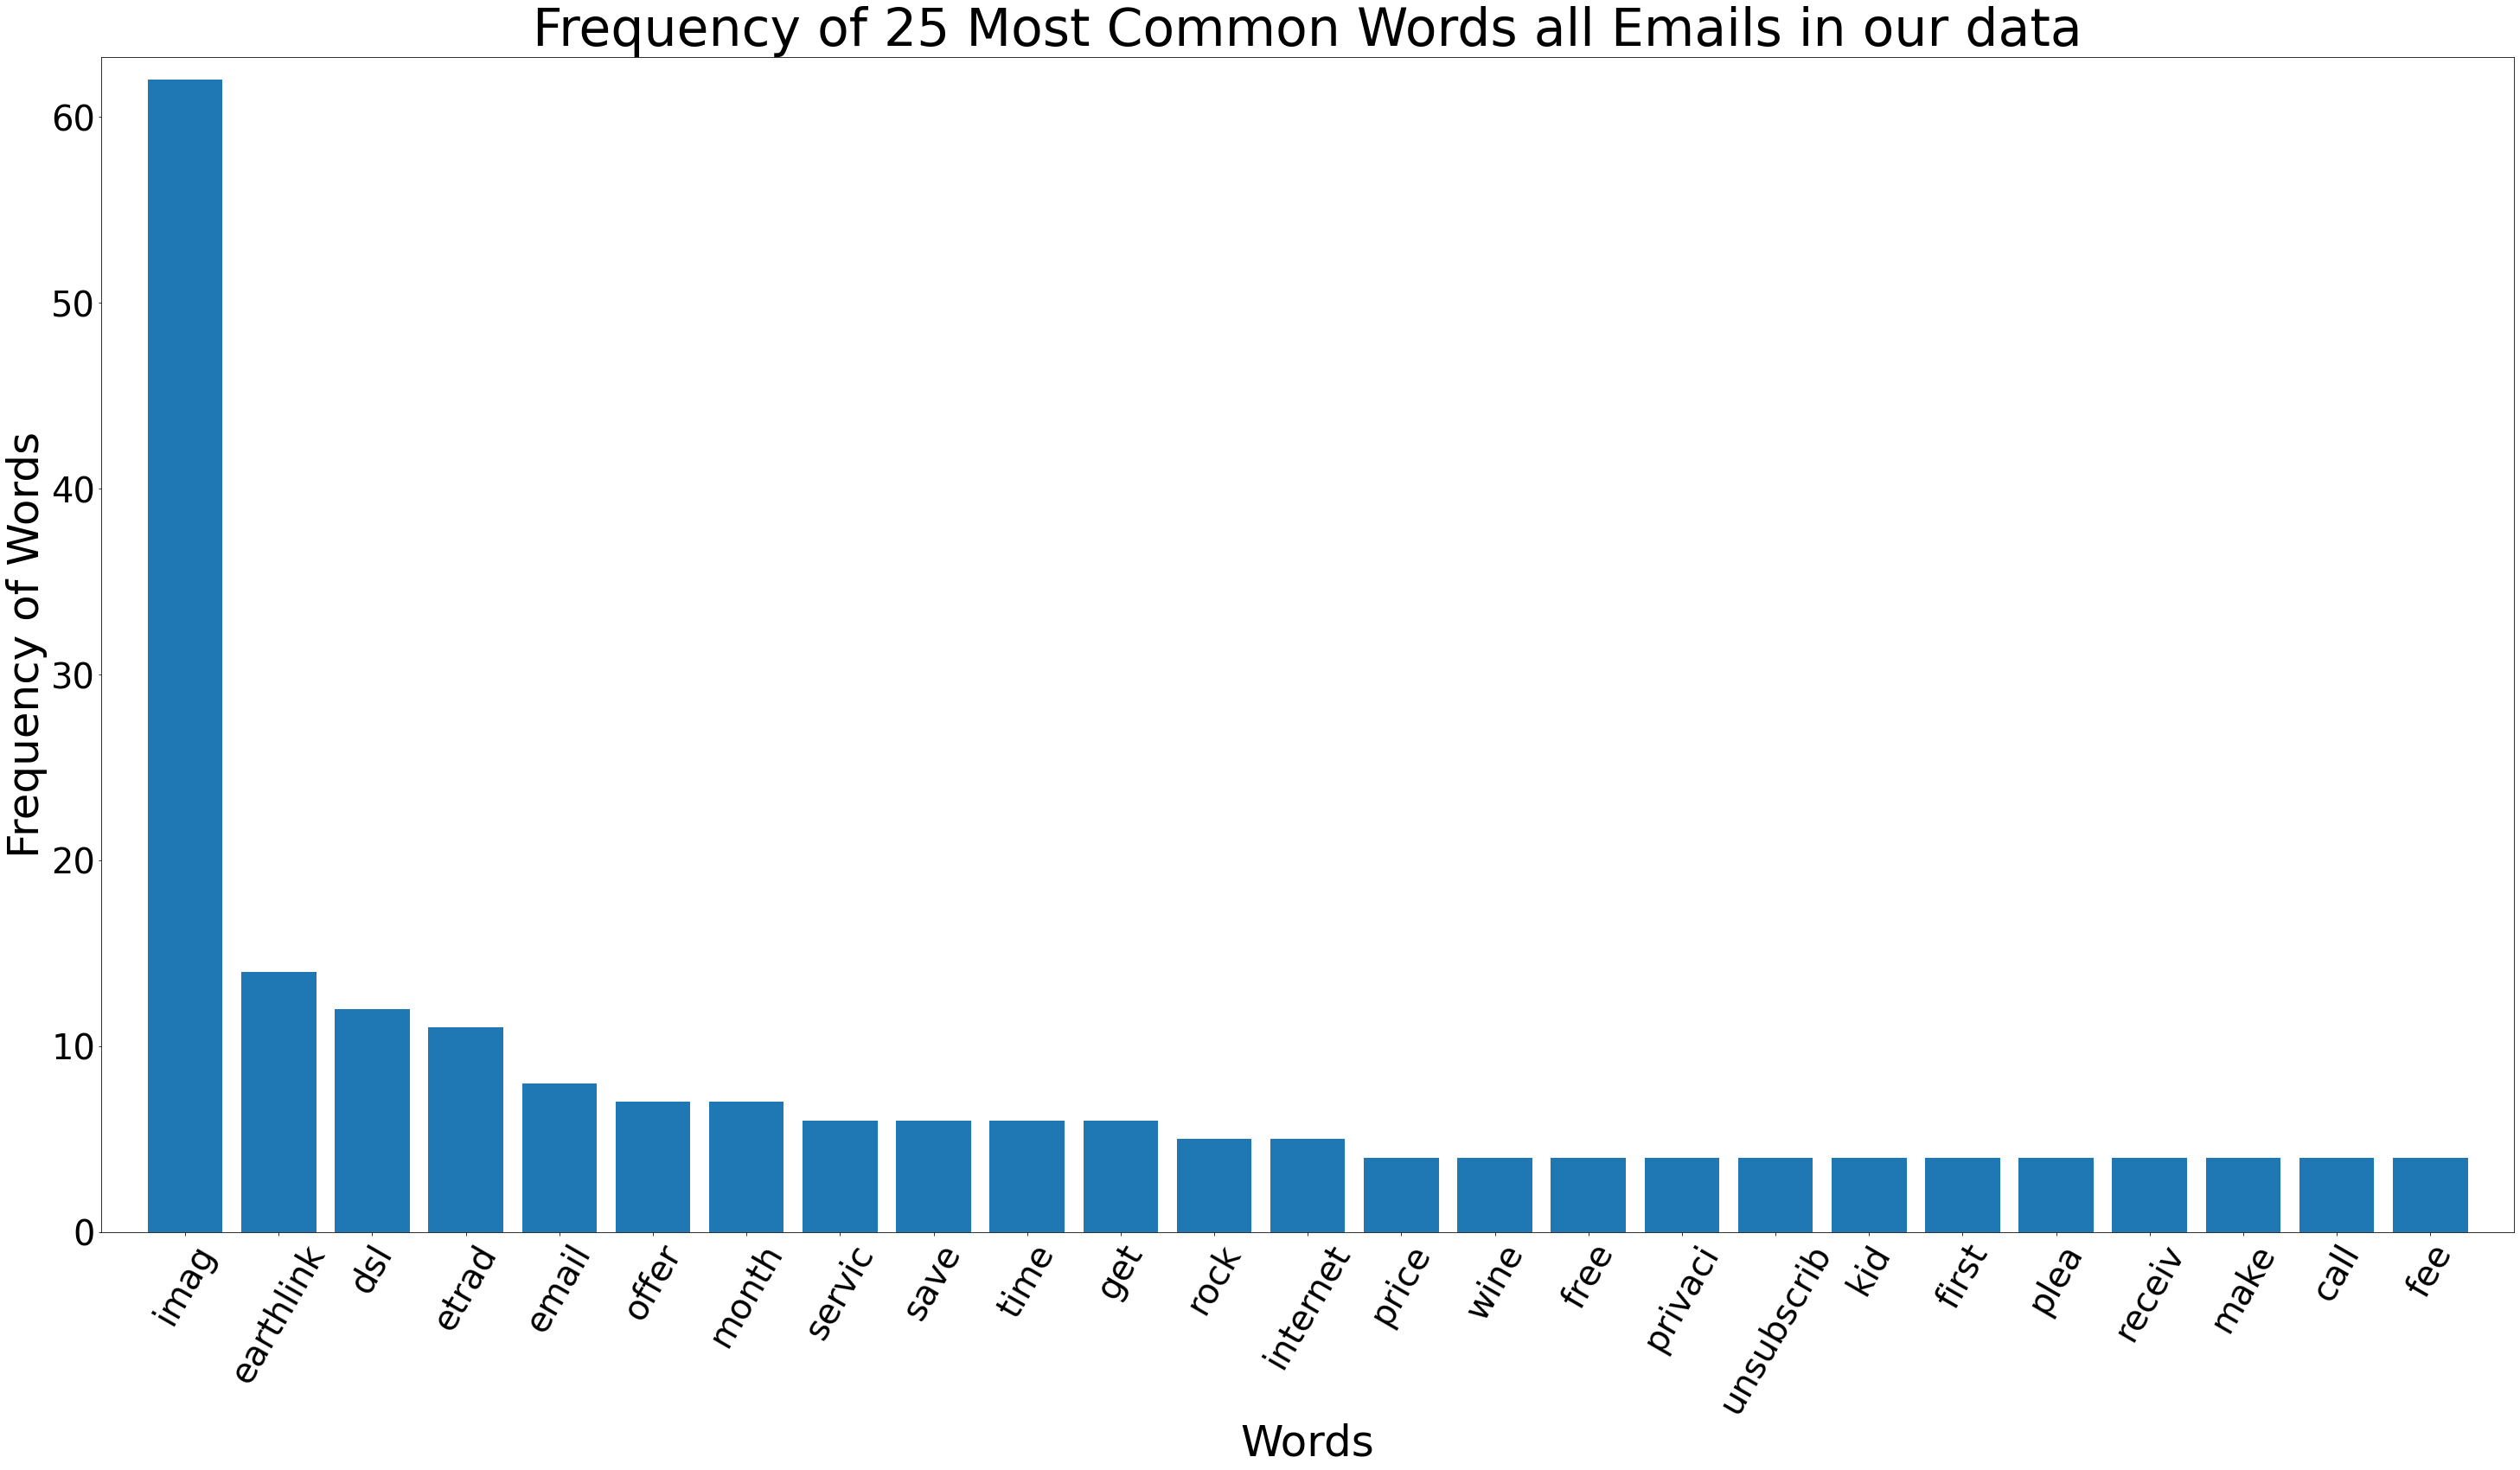

In [57]:
mostcommon_all = FreqDist(all_toc).most_common(25)
x_all, y_all = zip(*mostcommon_all)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x_all, y_all)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words all Emails in our data', fontsize=60)
plt.show()

# N-gram
## Bi-Gram Chart

In [58]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [59]:
# Top 20 Bi-gram words
top2_words = get_top_n2_words(data["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

,Bi-gram,Freq
0,origin messag,9565
1,cc subject,5355
2,imag imag,4888
3,let know,4825
4,would like,3375
5,trans_typ final,2761
6,mkt_type trans_dat,2582
7,subject fw,2323
8,final sc_id,2264
9,new york,2141


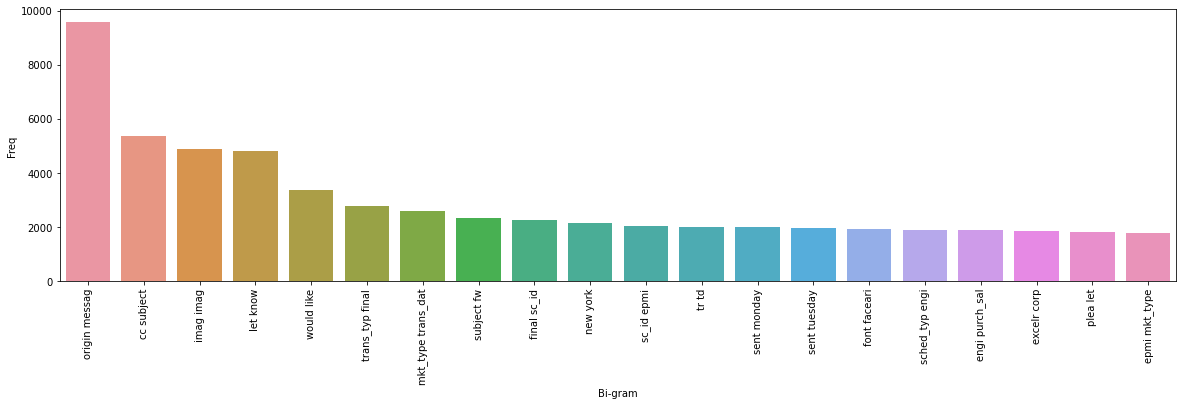

In [60]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

## Tri-Gram Chart

In [61]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [62]:
top3_words = get_top_n3_words(data["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [63]:
# Top 20 Tri gram words
top3_df.head(30)

,Tri-gram,Freq
0,imag imag imag,3130
1,trans_typ final sc_id,2264
2,sched_typ engi purch_sal,1897
3,final sc_id epmi,1793
4,sc_id epmi mkt_type,1793
5,epmi mkt_type trans_dat,1793
6,mkt_type trans_dat trading_sc,1793
7,pnt_of_intrc sched_typ engi,1793
8,engi purch_sal deal_no,1793
9,hour bad data,1740


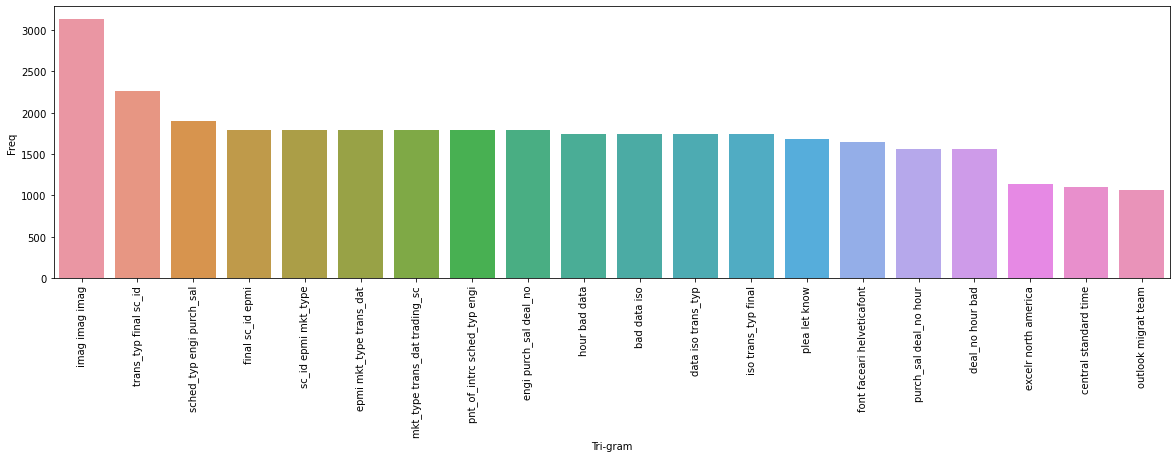

In [64]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [65]:
d=data[['cleaned','Class']]

In [66]:
d

,cleaned,Class
0,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...,Abusive
1,fuck,Abusive
2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...,Abusive
3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun ...,Abusive
4,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...,Abusive
...,...,...
26419,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach t...,Non Abusive
26420,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...,Non Abusive
26421,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...,Non Abusive
26422,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...,Non Abusive


## Cleaning the Data

### Removing words greater than 15 characters

In [67]:
d['unwanted']=d['cleaned'].str.findall('\w{15,}').str.join(' ')

In [68]:
d[['cleaned','unwanted']]

,cleaned,unwanted
0,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...,arnoldhouectect
1,fuck,
2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...,
3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun ...,arnoldhouectect
4,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...,arnoldhouectect
...,...,...
26419,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach t...,
26420,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...,
26421,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...,smartreminderscom
26422,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...,


In [69]:
d['cleaned_2']=d['cleaned'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) < 15))

In [70]:
d[['cleaned','unwanted','cleaned_2']]

,cleaned,unwanted,cleaned_2
0,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...,arnoldhouectect,eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det cle...
1,fuck,,fuck
2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...,,gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...
3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun ...,arnoldhouectect,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun j...
4,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...,arnoldhouectect,asshol john j lavoratoexcelr john cc subject john seem make gambl problem go away bill denver jack
...,...,...,...
26419,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach t...,,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach th...
26420,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...,,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...
26421,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...,smartreminderscom,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...
26422,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...,,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...


We can see the words with letters>15 have been removed from the text .

In [71]:
print(d.iloc[0,0])
print(d.iloc[0,-1])

eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phil  indi  cinnci  det  clev  den  dall  jack 
eat shit john j lavoratoexcelr pm john cc subject footbal bet minn buff phil indi cinnci det clev den dall jack


### Removing some unwanted words

In [72]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
sw_nltk = stopwords.words('english')

In [74]:
sw_nltk.extend(['excelr','market','diamond','lavoratoexcelr','cc subject','excelronlin','north','buddi','green','turquois','original message'
,'subject','cc','image','america','corp','let','know','beckhouectect','week','fw','today','sally','new','york','said','facerial','helveticafont',
'trans_type','final','salli', 'beckhouectect','trans_typ', 'final','communicationsexcelr', 'commun','mkt_type', 'trans_dat','eric', 'basshouectect','final','sc_id',
'wednesday','dow', 'jone','sched_typ', 'engi','purch_sal','mkt_type', 'trans_dat', 'trading_sc','imag','origin','messag','sent'])

In [75]:
d['cleaned_3'] = d['cleaned_2'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [76]:
d['cleaned_3']=d['cleaned_3'].apply(' '.join)

In [77]:
d['cleaned_3']

0                      eat shit john j pm john footbal bet minn buff phil indi cinnci det clev den dall jack
1                                                                                                       fuck
2        gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...
3        sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr john yea...
4                                   asshol john j john john seem make gambl problem go away bill denver jack
                                                        ...                                                 
26419    need lead busi need increas internet exposur thousand join internet daili ever sinc reach thousa...
26420    garth brook wrap win ticket trip garth brook show hey launcher countri king garth brook releas f...
26421    imageimageimag dear smartremind member franchoic free oneonon consult servic peopl look purchas ...
26422    kid rock f

### Building wordcloud after removing unwanted stuff / after cleaning the data

In [78]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [79]:
# Joining the list into one string/text
text = ' '.join(d['cleaned_3'])

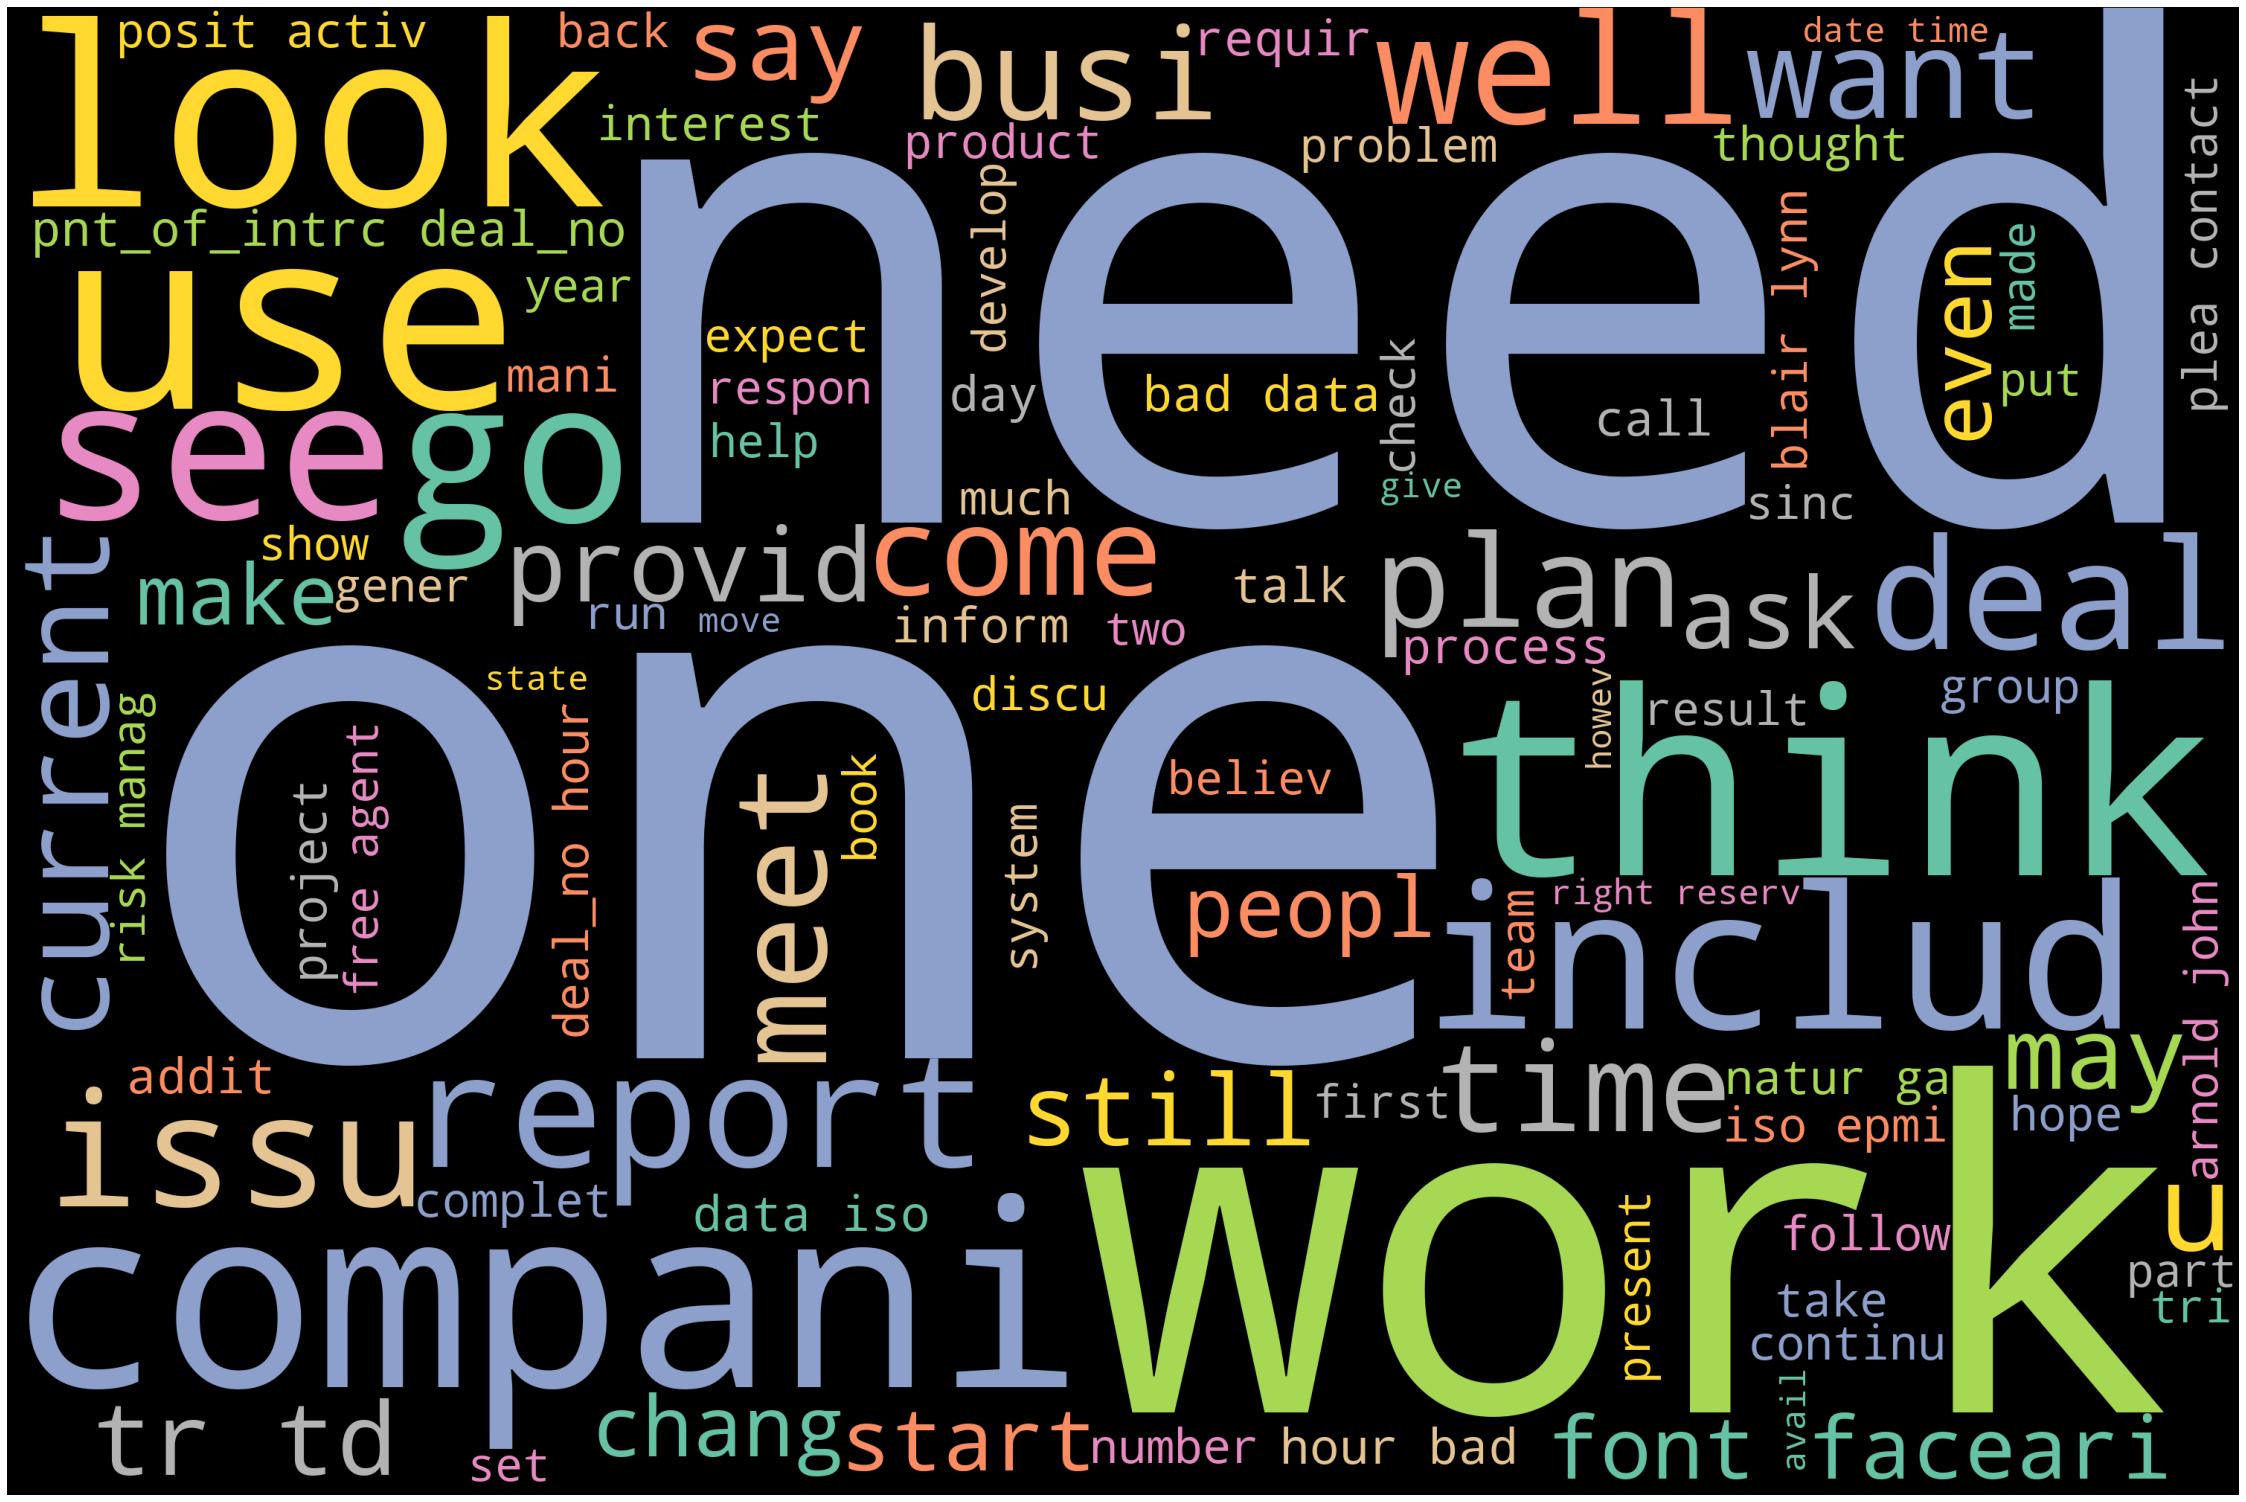

In [80]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [81]:
df=d[['cleaned_3','Class']]

In [82]:
df.to_csv(r'cleandata.csv',index=True)

In [84]:
data= pd.read_csv("cleandata.csv",delimiter = ',')
data

,Unnamed: 0,cleaned_3,Class
0,0,eat shit john j pm john footbal bet minn buff phil indi cinnci det clev den dall jack,Abusive
1,1,fuck,Abusive
2,2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price ...,Abusive
3,3,sorri taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr john yea...,Abusive
4,4,asshol john j john john seem make gambl problem go away bill denver jack,Abusive
...,...,...,...
26419,26419,need lead busi need increas internet exposur thousand join internet daili ever sinc reach thousa...,Non Abusive
26420,26420,garth brook wrap win ticket trip garth brook show hey launcher countri king garth brook releas f...,Non Abusive
26421,26421,imageimageimag dear smartremind member franchoic free oneonon consult servic peopl look purchas ...,Non Abusive
26422,26422,kid rock forev offici kid rock site wwwkidrockcom time get cocki hey launcher muchanticip follow...,Non Abusive
